- 00시 / 05시 / 17시 휴게
- 6월 23일 11시
- 6월 27일 17~18시 X

In [1]:
import os
import time
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [76]:
import dask.dataframe as dd

data_list = []
for filename in os.listdir('mct31_data'):
    if filename in ['mct31_7월2주차.csv', 'mct31_7월3주차.csv', 'mct31_7월4주차.csv']:
        continue
    raw_data = dd.read_csv('mct31_data/' + filename, dtype={'F_RunState': 'object'})
    raw_data['GDatetime'] = dd.to_datetime(raw_data['GDatetime']).dt.round('S')
    raw_data = raw_data.compute()  # Dask DataFrame을 Pandas DataFrame으로 변환
    raw_data = raw_data.set_index('GDatetime')
    raw_data['F_RunState'] = raw_data['F_RunState'].fillna('0')
    raw_data['F_RunState'] = raw_data['F_RunState'].map(lambda x: 1 if x == '작업중' else 2 if x == '작업대기' else 3 if x == '작업정지' else 4 if x == 'STOP' else 5 if x == '알람중' else 0)
    raw_data['F_OperationTime'] = raw_data['F_OperationTime'].fillna(0)
    raw_data['F_CuttingTime'] = raw_data['F_CuttingTime'].fillna(0)
    raw_data['F_ToolNum'] = raw_data['F_ToolNum'].bfill()
    raw_data = raw_data.drop(['F_AbsoluteX', 'F_AbsoluteY', 'F_AbsoluteZ', 'F_DistanceX', 'F_DistanceY', 'F_DistanceZ'], axis=1)
    data_list.append(raw_data.iloc[:, :-6])

df1 = data_list[0]
df2 = data_list[1]
df3 = data_list[2]
df4 = data_list[3]
df5 = data_list[4]
df6 = data_list[5]
df7 = data_list[6]
df8 = data_list[7]

data = pd.concat([df4,df5,df6,df7], axis=0)
data_all = pd.concat(data_list, axis=0)

# Calculate the shifted differences
diffs = np.diff(data['F_ToolNum'], prepend=data['F_ToolNum'][0])

# Initialize transformed list
transformed = [0]  # starting with 0 as the first value

# Iterate over the differences and build the transformed list
for i in range(1, len(diffs)):
    if diffs[i] == 0:
        transformed.append(transformed[i-1])
    else:
        transformed.append(data['F_ToolNum'][i-1])
data['F_ToolNum'] = transformed

data['G_MP'] = data['G_MV'] * data['G_MA']

data

,F_RunState,F_OperationTime,F_CuttingTime,F_CycleTime,F_SpindleRPM1,F_SpindleTroq1,F_SpindleGearRatio1,F_ToolNum,G_ADC1,G_ADC2,G_ADC3,G_ADC4,G_MV,G_MA,G_MActP,G_MRActP,G_MPF,G_MFeq,G_MTemp,G_MP
GDatetime,,,,,,,,,,,,,,,,,,,,
2023-06-05 07:03:45,2,901411.0,111121.0,0,0.0,0.0,0.0,0.0,24.400000,43.700001,0.0,0.56,222.020004,2.974,0.924,0.628,0.701,59.970001,39.0,660.287488
2023-06-05 07:03:46,2,901411.0,111121.0,0,0.0,0.0,0.0,0.0,24.400000,43.700001,0.0,0.56,221.529999,2.976,0.924,0.624,0.700,59.970001,39.0,659.273292
2023-06-05 07:03:47,2,901411.0,111121.0,0,0.0,0.0,0.0,0.0,24.400000,43.700001,0.0,0.56,221.529999,2.976,0.924,0.624,0.700,59.970001,39.0,659.273292
2023-06-05 07:03:48,2,901411.0,111121.0,0,0.0,0.0,0.0,0.0,24.400000,43.700001,0.0,0.56,220.729996,2.976,0.920,0.624,0.700,59.959999,39.0,656.892483
2023-06-05 07:03:49,2,901411.0,111121.0,0,0.0,0.0,0.0,0.0,24.299999,43.700001,0.0,0.56,221.630005,2.962,0.920,0.628,0.701,59.959999,39.0,656.468051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-02 23:59:55,0,0.0,0.0,0,0.0,0.0,0.0,NaN,29.400000,59.400002,0.0,0.56,222.529999,0.064,0.004,0.004,0.255,59.990002,43.0,14.241921
2023-07-02 23:59:56,0,0.0,0.0,0,0.0,0.0,0.0,NaN,29.400000,59.400002,0.0,0.56,222.529999,0.064,0.004,0.004,0.255,59.990002,43.0,14.241921
2023-07-02 23:59:57,0,0.0,0.0,0,0.0,0.0,0.0,NaN,29.400000,59.400002,0.0,0.56,222.679993,0.063,0.004,0.004,0.256,59.990002,43.0,14.028840


In [68]:
len(data)

2353525

In [22]:
# Sample data
data = [1,2,2,3,3,3,4,4,4,4,5,5,5,5,5,6,6,6,6,6,6]

# Calculate the shifted differences
diffs = np.diff(data, prepend=data[0])

# Initialize transformed list
transformed = [0]  # starting with 0 as the first value

# Iterate over the differences and build the transformed list
for i in range(1, len(diffs)):
    if diffs[i] == 0:
        transformed.append(transformed[i-1])
    else:
        transformed.append(data[i-1])

transformed

[0, 1, 1, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5]

In [45]:
def highlight_break(ax, sub_df):
    time_ranges_colors = [('00:00:00', '01:00:00', 'red'),
                          ('05:00:00', '06:00:00', 'blue'),
                          ('12:00:00', '13:00:00', 'green'), 
                          ('17:00:00', '18:00:00', 'magenta')]

    # sub_df의 모든 고유한 날짜를 가져옵니다.
    unique_dates = sub_df.index.normalize().unique()

    for start, end, color in time_ranges_colors:
        for date in unique_dates:
            # 각 날짜와 시간대를 결합하여 시작 및 종료 시간을 생성합니다.
            start_time = pd.Timestamp(date.strftime('%Y-%m-%d') + ' ' + start)
            end_time = pd.Timestamp(date.strftime('%Y-%m-%d') + ' ' + end)

            ax.fill_between(sub_df.index, 
                            ax.get_ylim()[0], ax.get_ylim()[1], 
                            where=(sub_df.index >= start_time) & (sub_df.index <= end_time), 
                            color=color, alpha=0.3)

def simple_plot(data, date=None, col=None):
    start_time = time.time()
    plt.figure(figsize=(20, len(col)*2))

    # col이 None인 경우 모든 열을 선택
    if col is None:
        col = data.columns

    if isinstance(date, tuple):
        tmp = data.loc[date[0]:date[1], col]
    
        for i, column in enumerate(tmp.columns):
            ax = plt.subplot(len(tmp.columns), 1, i + 1)
            plt.plot(tmp[column])
            highlight_break(ax, tmp)

            for x_position in data.loc[date[0]:date[1]][data['F_RunState'] == 2].index:
                plt.axvline(x=x_position, color='r', alpha=0.1)
            plt.title(column)    
    
    else:
        tmp = data.loc[date][col]

        for i, column in enumerate(tmp.columns):
            ax = plt.subplot(len(tmp.columns), 1, i + 1)
            plt.plot(tmp[column])
            highlight_break(ax, tmp)

            for x_position in data.loc[date][data.loc[date]['F_RunState'] == 2].index:
                plt.axvline(x=x_position, color='r', alpha=0.1)

            plt.title(column)    
        
    plt.tight_layout()
    plt.show()

    end_time = time.time()
    print(f'소요 시간 : {(end_time - start_time):.2f} 초')

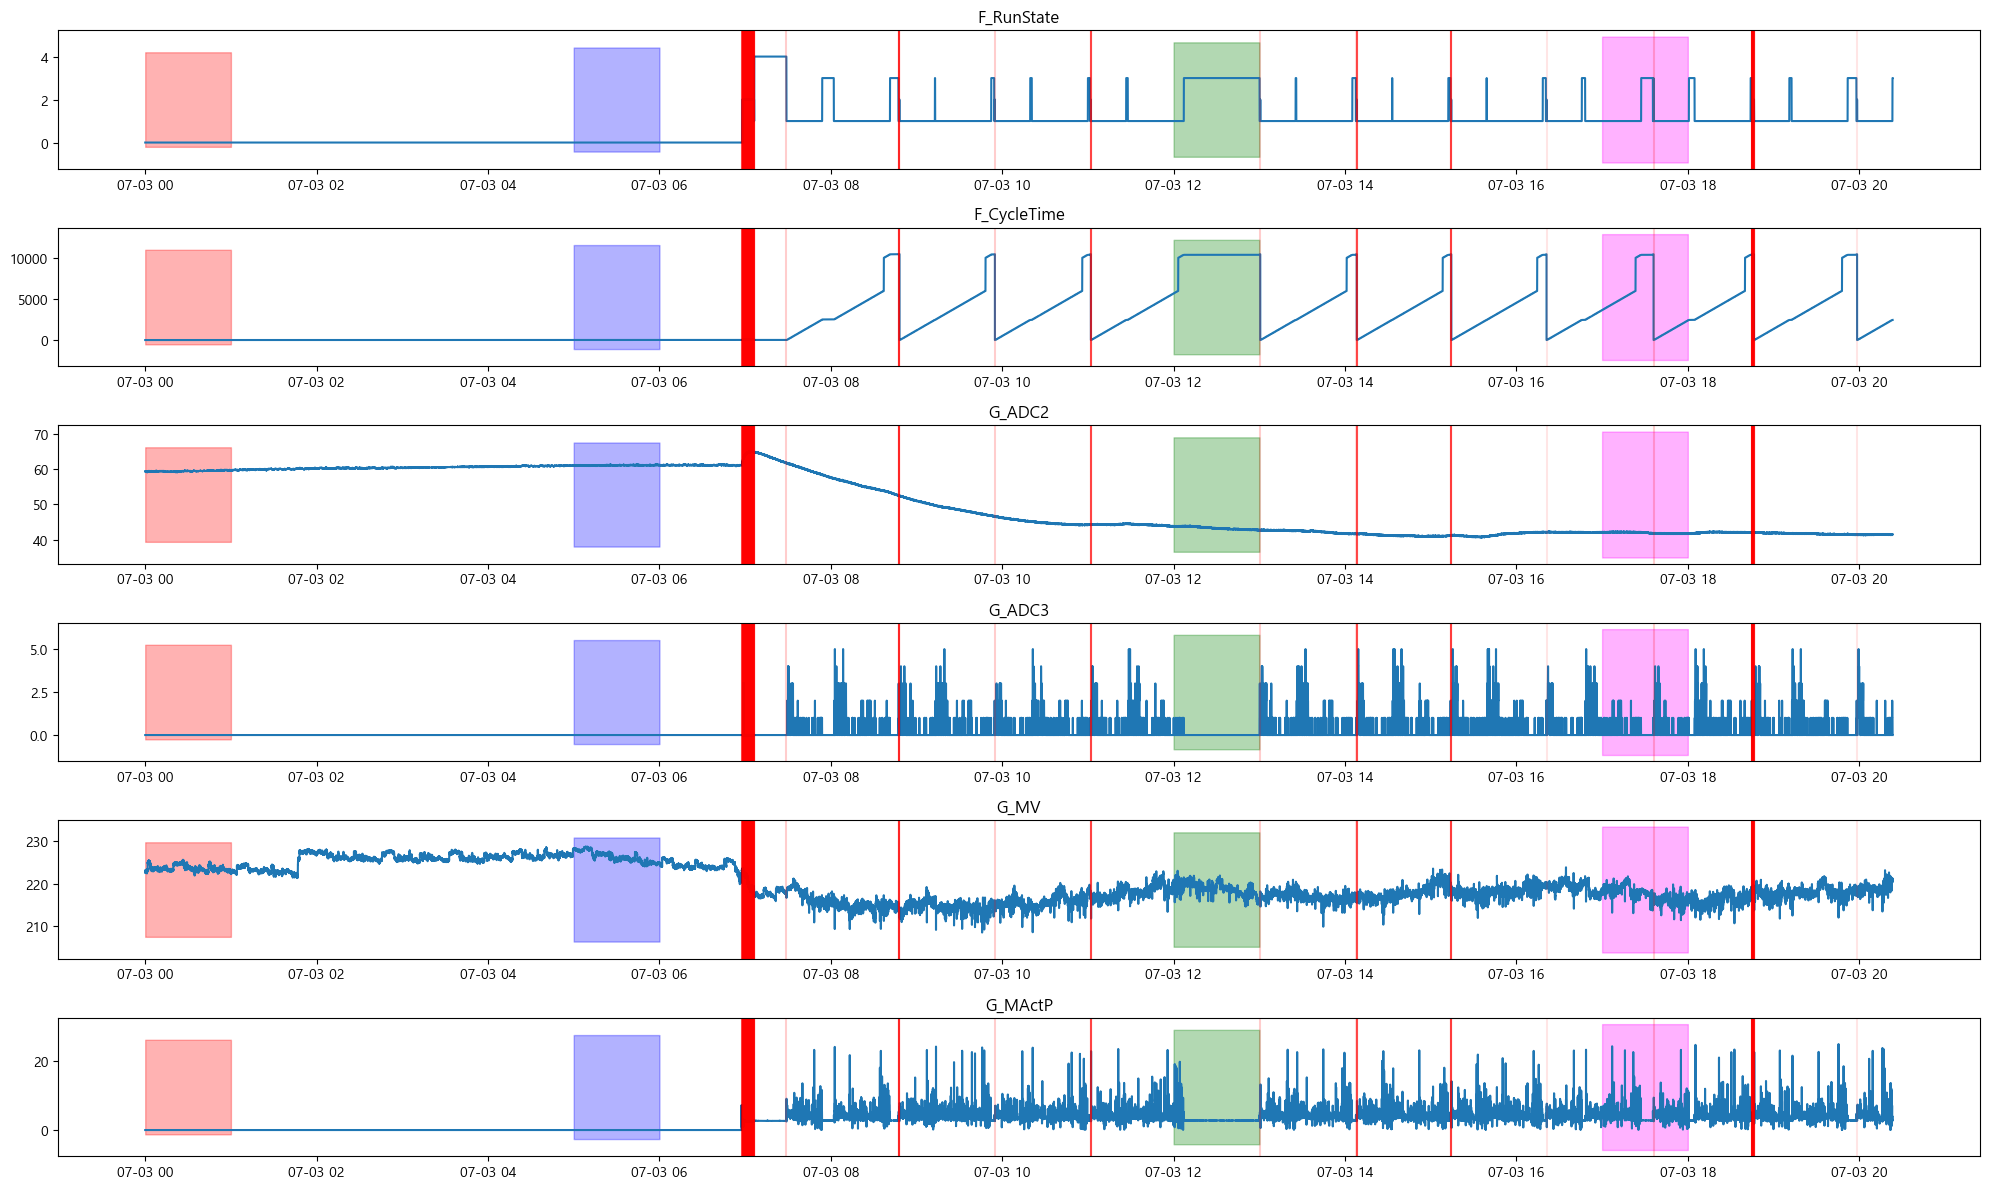

소요 시간 : 2.18 초


In [48]:
simple_plot(data, ('2023-07-03'), ['F_RunState', 'F_CycleTime', 'G_ADC2', 'G_ADC3', 'G_MV', 'G_MActP'])

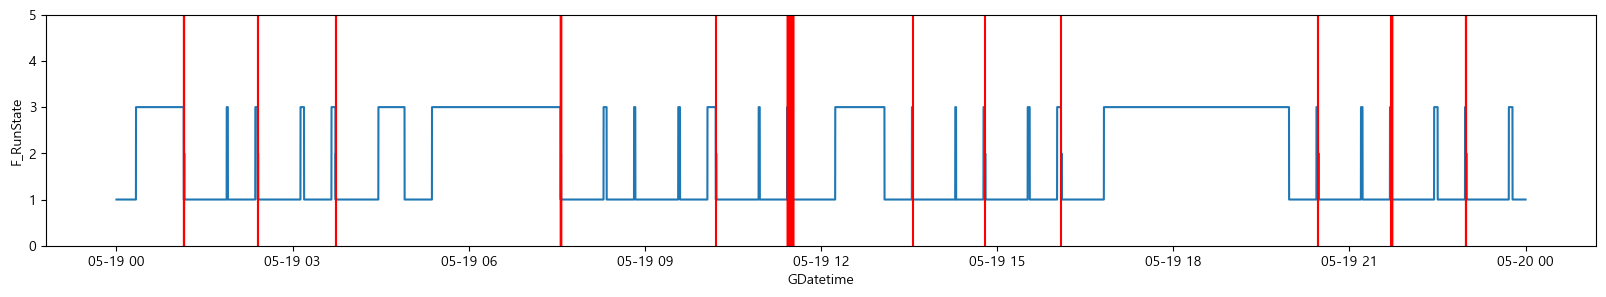

In [8]:
tmp = data.loc['2023-05-19']['F_RunState']
plt.figure(figsize=(20,3))
sns.lineplot(tmp)
for x_position in tmp[tmp == 2].index:
    plt.axvline(x=x_position, color='r')
plt.yticks(range(6))
plt.show()

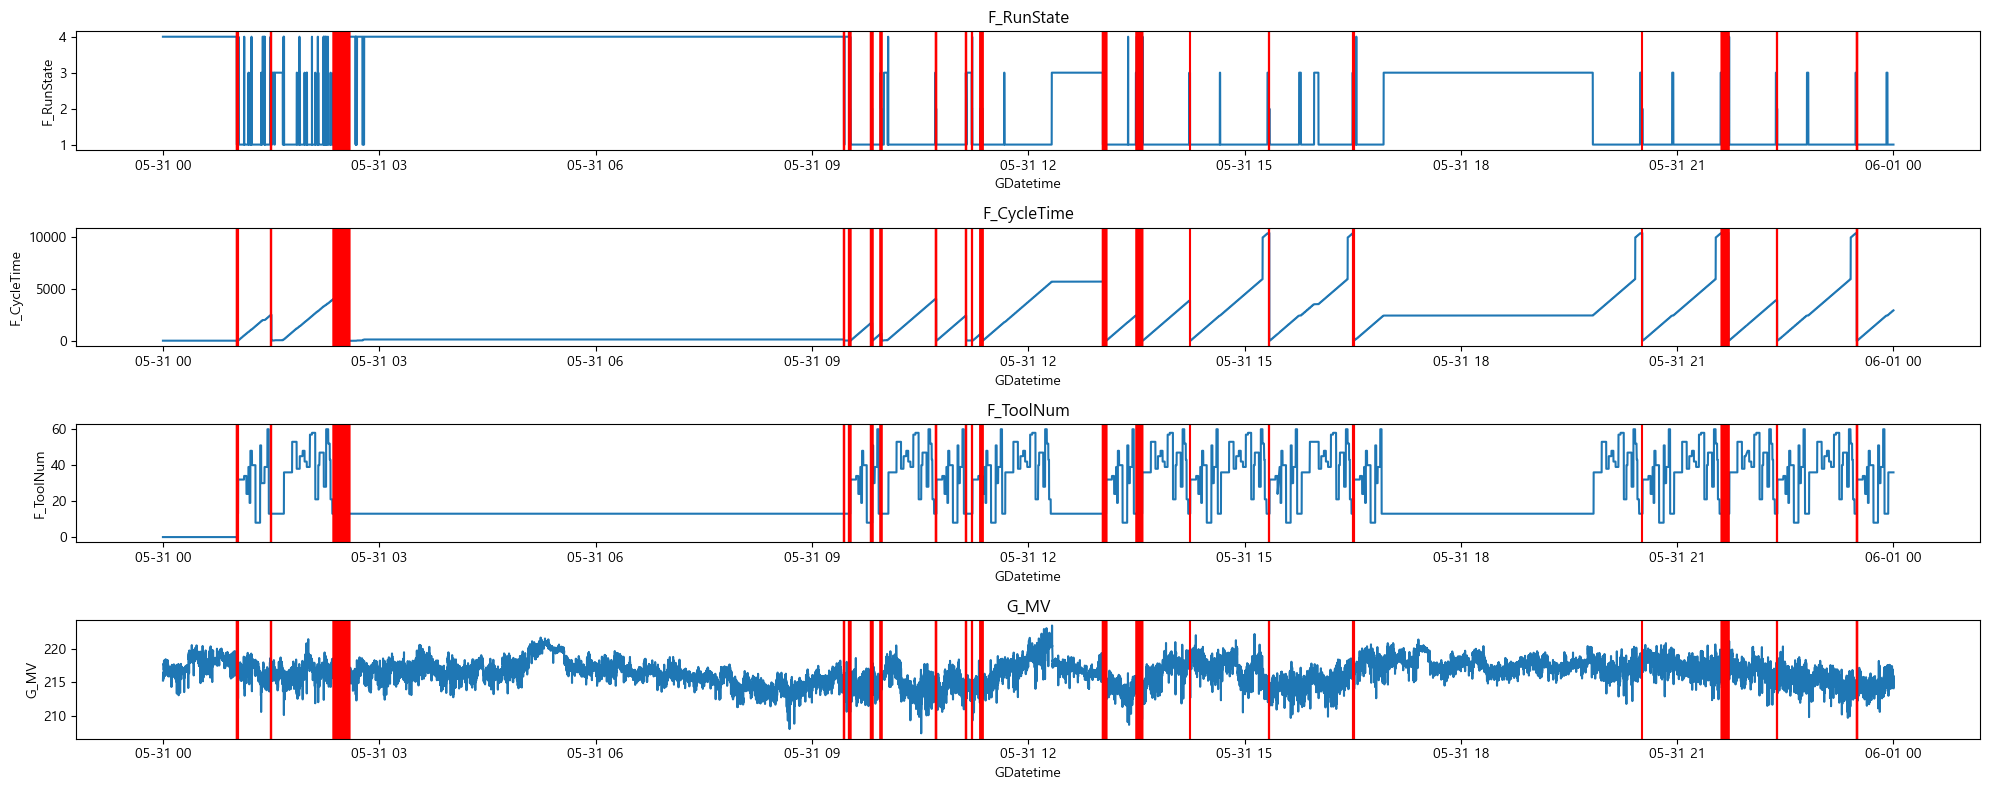

In [18]:
tmp = data.loc['2023-05-31'][['F_RunState', 'F_CycleTime', 'F_ToolNum', 'G_MV']]
plt.figure(figsize=(20, 8))
for i, column in enumerate(tmp.columns):
    plt.subplot(4, 1, i+1)
    sns.lineplot(tmp[column])
    for x_position in tmp[tmp['F_RunState'] == 2].index:
        plt.axvline(x=x_position, color='r')
    plt.title(column)
plt.tight_layout()
plt.show()

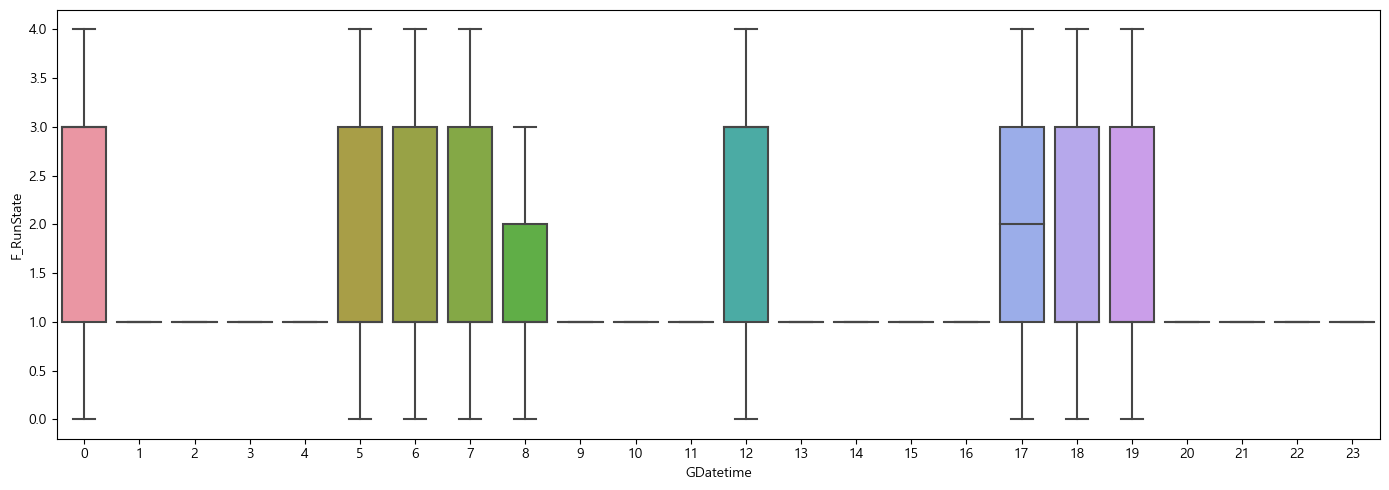

소요 시간 : 1.4694960117340088


In [36]:
start_time = time.time()

plt.figure(figsize=(14, 5))
sns.boxplot(x=data.index.hour.astype('str'), y=data['F_RunState'], order=[str(i) for i in range(24)], showfliers=False)
plt.tight_layout()
plt.show()

end_time = time.time()
print('소요 시간 :', end_time - start_time)

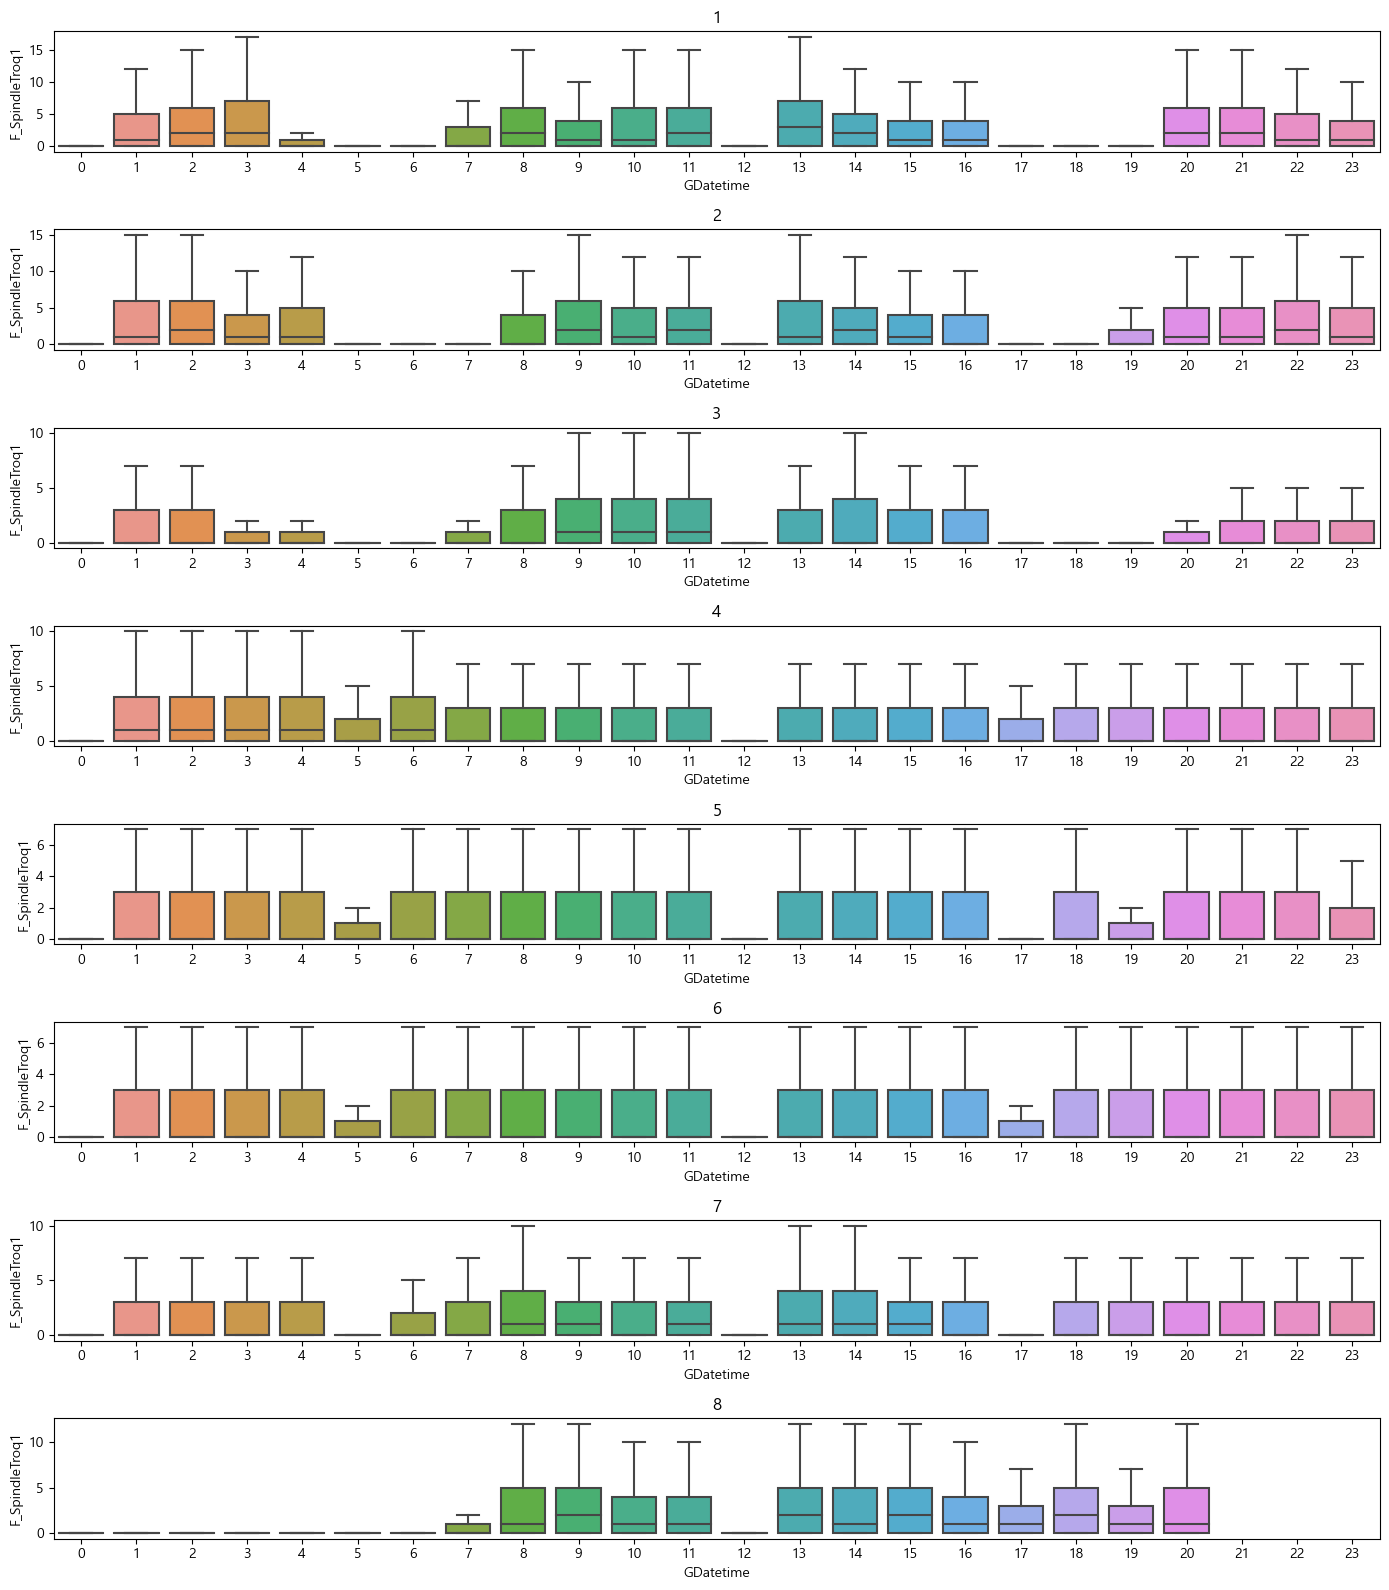

소요 시간 : 2.2405107021331787


In [15]:
start_time = time.time()

plt.figure(figsize=(14, 16))
for i, df in enumerate(data_list):
    plt.subplot(len(data_list), 1, i+1)
    sns.boxplot(x=df.index.hour.astype('str'), y=df['F_SpindleTroq1'], order=[str(i) for i in range(24)], showfliers=False)
    plt.title(i+1)
plt.tight_layout()
plt.show()

end_time = time.time()
print('소요 시간 :', end_time - start_time)

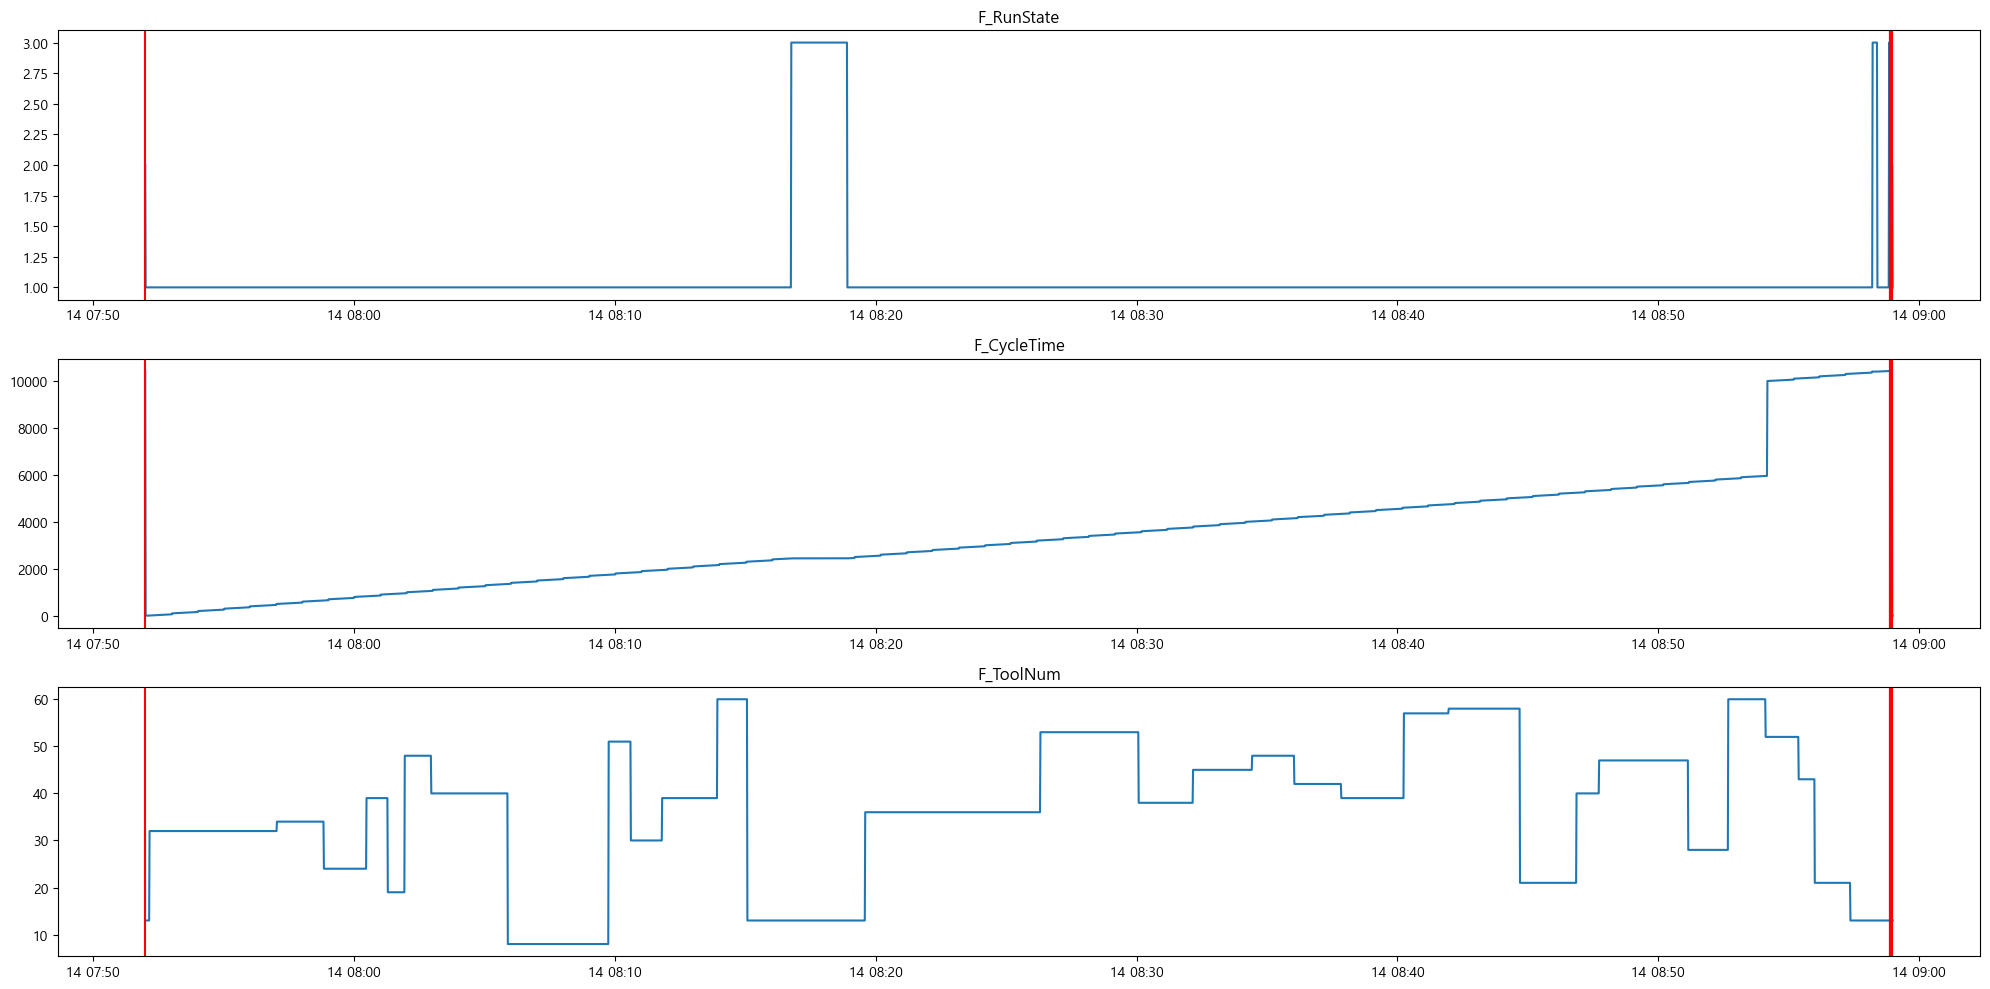

소요 시간 : 0.41401028633117676


In [63]:
start_time = time.time()

tmp = df5.loc['2023-06-14 07:52':'2023-06-14 08:58'][['F_RunState', 'F_CycleTime', 'F_ToolNum']]
plt.figure(figsize=(20,10))

for i, column in enumerate(tmp.columns):
    plt.subplot(len(tmp.columns), 1, i + 1)
    plt.plot(tmp[column])

    # 날짜별로 그룹화하여 각 날짜에 대해 시간 범위 적용
    tmp.groupby(tmp.index.date).apply(highlight_periods)
    # tmp.groupby(tmp.index.date).apply(highlight_runstate)  # 이 부분을 추가
    for x_position in tmp[tmp['F_RunState'] == 2].index:
        plt.axvline(x=x_position, color='r')
    
    plt.title(column)
    
plt.tight_layout()
plt.show()

end_time = time.time()
print('소요 시간 :', end_time - start_time)

In [68]:
df5.loc['2023-06-14 07:52':'2023-06-14 08:58']['F_ToolNum']

GDatetime
2023-06-14 07:52:00    13.0
2023-06-14 07:52:01    13.0
2023-06-14 07:52:02    13.0
2023-06-14 07:52:03    13.0
2023-06-14 07:52:04    13.0
                       ... 
2023-06-14 08:58:55    13.0
2023-06-14 08:58:56    13.0
2023-06-14 08:58:57    13.0
2023-06-14 08:58:58    13.0
2023-06-14 08:58:59    13.0
Name: F_ToolNum, Length: 4001, dtype: float64

<Axes: xlabel='GDatetime'>

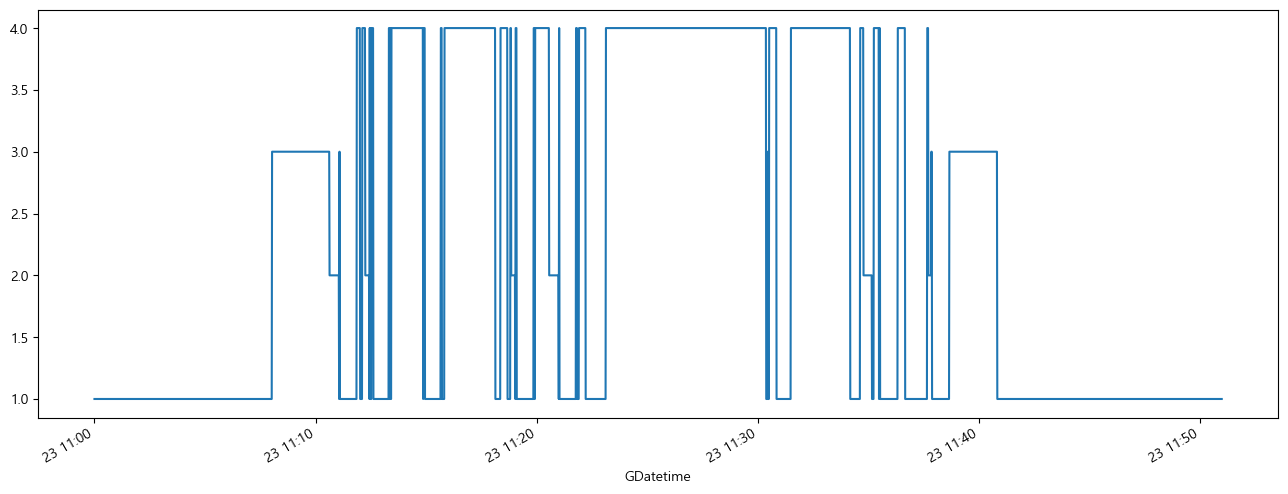

In [10]:
data.loc['2023-06-23 11':'2023-06-23 11:50']['F_RunState'].plot(figsize=(16,6))

<Axes: xlabel='GDatetime'>

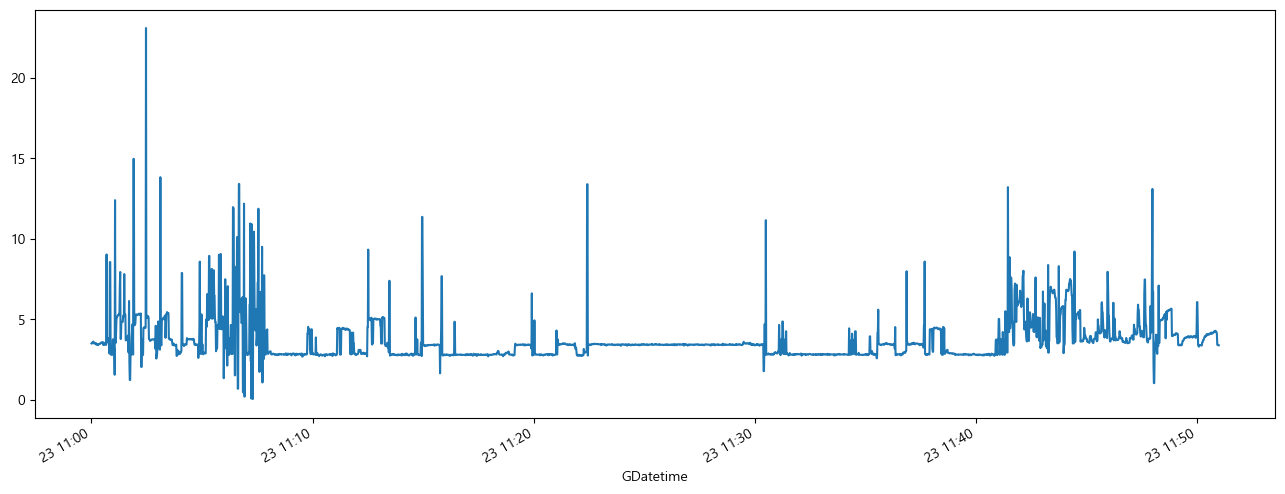

In [17]:
data.loc['2023-06-23 11':'2023-06-23 11:50']['G_MActP'].plot(figsize=(16,6))

In [9]:
# 연속된 0 값들에 대해 그룹화
run_wait = 2
data['group'] = ((data['F_RunState'] == run_wait) != (data['F_RunState'].shift() == run_wait )).cumsum()

# 각 그룹에 대한 카운트
counts = data.groupby('group')['F_RunState'].sum()

# 1분 (60초) 이상 지속되는 구간만 선택
term = 10000
long_zeros = counts[counts >= term].index

# 결과 출력
for i, group in enumerate(long_zeros):
    times = data[data['group'] == group].index
    start_time = times[0]
    end_time = times[-1]
    print(f"{run_wait} 값이 {term//60}분 이상 지속되는 구간 {i+1}개: {start_time} ~ {end_time}")

2 값이 166분 이상 지속되는 구간 1개: 2023-05-18 15:52:00 ~ 2023-05-18 22:47:26
2 값이 166분 이상 지속되는 구간 2개: 2023-05-18 22:47:38 ~ 2023-05-19 01:09:10
2 값이 166분 이상 지속되는 구간 3개: 2023-05-19 03:44:15 ~ 2023-05-19 07:34:10
2 값이 166분 이상 지속되는 구간 4개: 2023-05-19 07:34:21 ~ 2023-05-19 10:12:49
2 값이 166분 이상 지속되는 구간 5개: 2023-05-19 11:31:08 ~ 2023-05-19 13:33:47
2 값이 166분 이상 지속되는 구간 6개: 2023-05-19 16:05:42 ~ 2023-05-19 20:28:20
2 값이 166분 이상 지속되는 구간 7개: 2023-05-19 22:59:29 ~ 2023-05-20 01:09:07
2 값이 166분 이상 지속되는 구간 8개: 2023-05-20 04:44:07 ~ 2023-05-20 06:37:38
2 값이 166분 이상 지속되는 구간 9개: 2023-05-22 07:04:27 ~ 2023-05-22 08:20:23
2 값이 166분 이상 지속되는 구간 10개: 2023-05-22 10:58:35 ~ 2023-05-22 14:24:53
2 값이 166분 이상 지속되는 구간 11개: 2023-05-22 15:59:25 ~ 2023-05-22 20:11:43
2 값이 166분 이상 지속되는 구간 12개: 2023-05-22 22:55:17 ~ 2023-05-23 01:04:49
2 값이 166분 이상 지속되는 구간 13개: 2023-05-23 02:25:05 ~ 2023-05-23 07:57:11
2 값이 166분 이상 지속되는 구간 14개: 2023-05-23 11:44:34 ~ 2023-05-23 13:44:20
2 값이 166분 이상 지속되는 구간 15개: 2023-05-23 16:36:57 ~ 2023-05-2

In [56]:
import plotly.graph_objects as go; import numpy as np
from plotly_resampler import register_plotly_resampler

# Call the register function once and all Figures/FigureWidgets will be wrapped
# according to the register_plotly_resampler its `mode` argument
register_plotly_resampler(mode='auto')


# auto mode: when working in an IPython environment, this will automatically be a 
# FigureWidgetResampler else, this will be an FigureResampler
f = go.Figure()
f.add_trace({"x":data.index, "y":data['F_RunState'], "name": "F_RunState"})
f.add_trace({"x":data.index, "y":data['F_CycleTime'], "name": "F_CycleTime"})
f.add_trace({"x":data.index, "y":data['F_OperationTime'], "name": "F_OperationTime"})
f.add_trace({"x":data.index, "y":data['G_ADC3'], "name": "G_ADC3"})
f.add_trace({"x":data.index, "y":data['G_ADC4'], "name": "G_ADC4"})
f.add_trace({"x":data.index, "y":data['F_ToolNum'], "name": 'F_ToolNum'})
f.add_trace({"x":data.index, "y":data['G_MV'], "name": "G_MV"})
f.add_trace({"x":data.index, "y":data['G_MA'], "name": "G_MA"})
f.add_trace({"x":data.index, "y":data['G_MActP'], "name": "G_MActP"})
f.add_trace({"x":data.index, "y":data['G_MPF'], "name": "G_MPF"})
f.add_trace({"x":data.index, "y":data['G_MFeq'], "name": "G_MFeq"})
f.add_trace({"x":data.index, "y":data['G_MTemp'], "name": "G_MTemp"})
f

FigureWidgetResampler({
    'data': [{'name': '<b style="color:sandybrown">[R]</b> F_RunState <i style="color:#fc9944">~40m</i>',
              'type': 'scatter',
              'uid': '7886bd64-7157-4bcd-8ba6-e2a4c64f4d46',
              'x': array([datetime.datetime(2023, 6, 5, 7, 3, 45),
                          datetime.datetime(2023, 6, 5, 7, 23, 43),
                          datetime.datetime(2023, 6, 5, 7, 43, 40), ...,
                          datetime.datetime(2023, 7, 2, 22, 20, 14),
                          datetime.datetime(2023, 7, 2, 23, 0, 8),
                          datetime.datetime(2023, 7, 2, 23, 59, 59)], dtype=object),
              'y': array([2, 4, 1, ..., 0, 0, 0], dtype=int64)},
             {'name': ('<b style="color:sandybrown">[R' ... 'style="color:#fc9944">~40m</i>'),
              'type': 'scatter',
              'uid': '8720979c-4d58-43c9-ac5a-bd7a748328df',
              'x': array([datetime.datetime(2023, 6, 5, 7, 3, 45),
                          

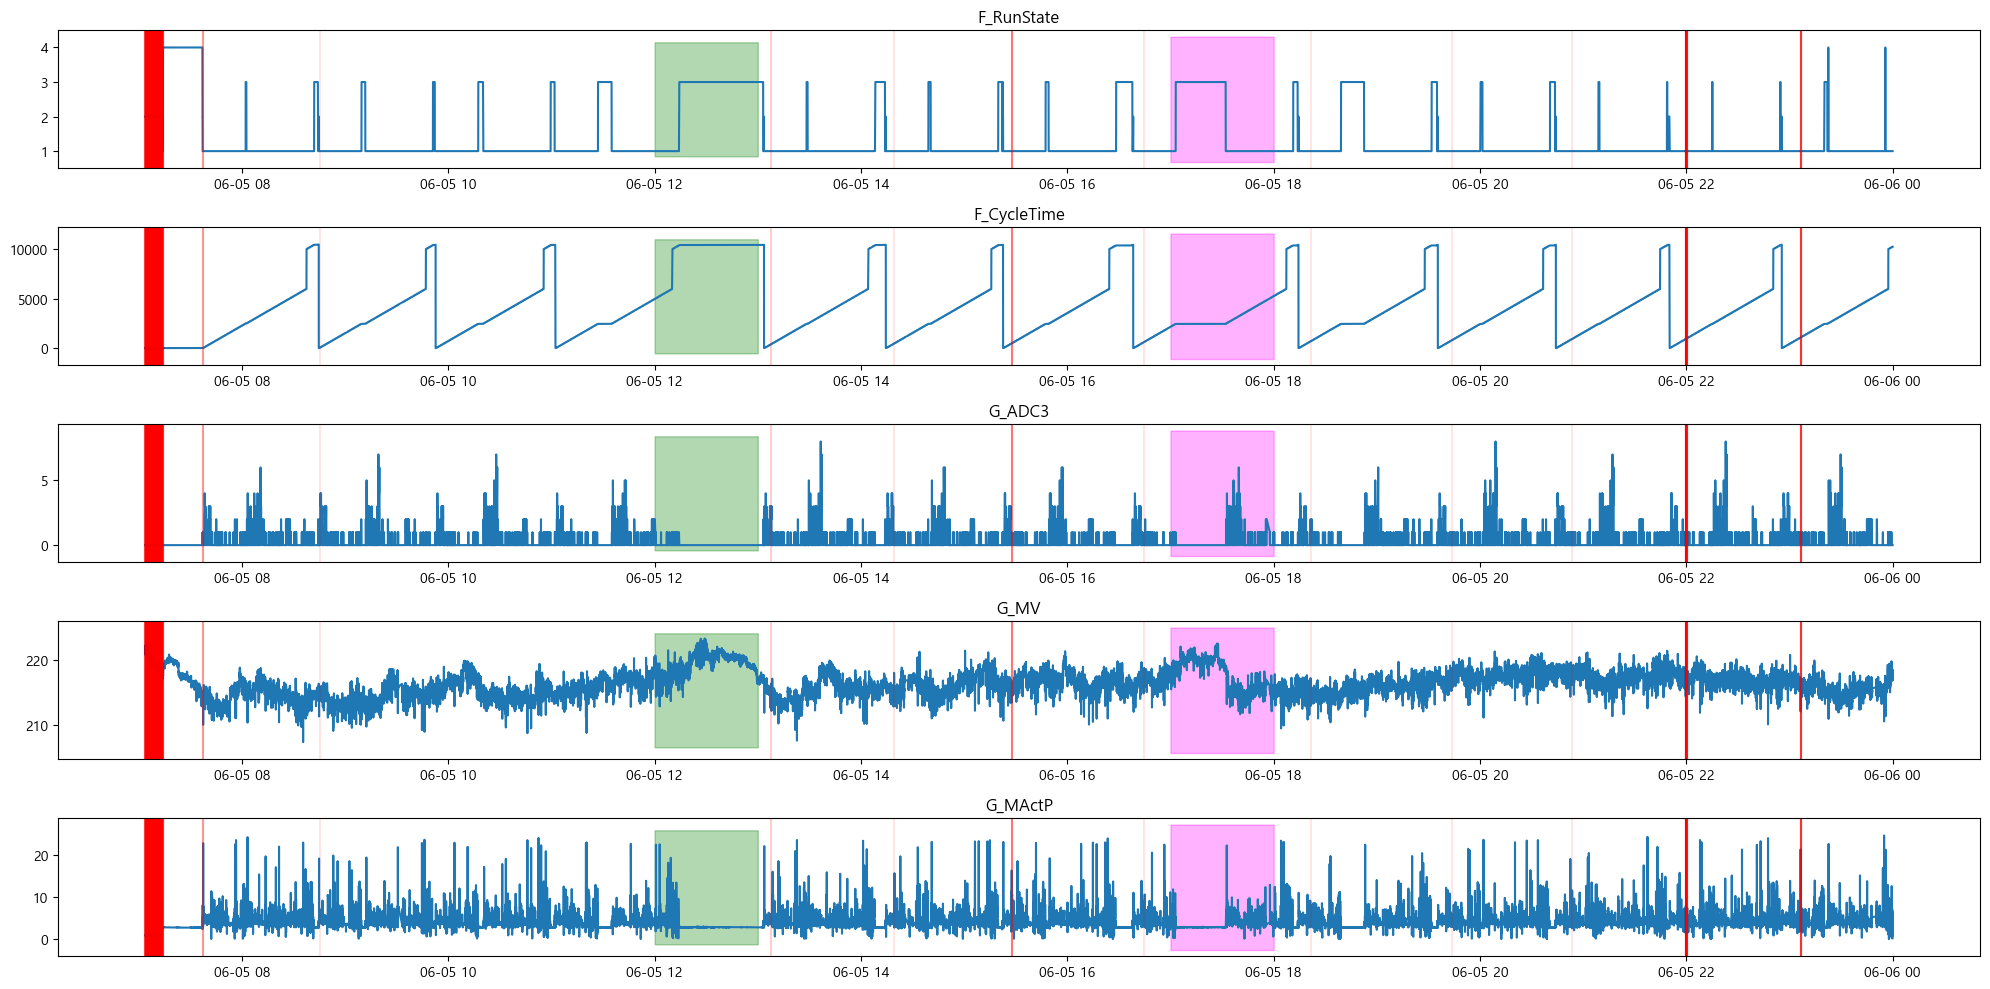

소요 시간 : 2.96 초


In [90]:
simple_plot(data, ('2023-06-05 00', '2023-06-05 23'), ['F_RunState', 'F_CycleTime', 'G_ADC3', 'G_MV', 'G_MActP'])

In [72]:
len(data)

2353525

In [80]:
time_ranges_drop = [
    ('2023-06-22 18:57:44', '2023-06-22 19:08:12'),
    ('2023-06-23 00:00:00', '2023-06-23 23:59:59'),
    ('2023-06-27 10:22:44', '2023-06-27 10:29:07'),
    ('2023-06-29 11:11:21', '2023-06-29 11:20:20'),
    ('2023-07-01 10:56:42', '2023-07-01 11:14:12')
]
tmp_data = data.copy()
# 각 시간 범위에 대해 drop을 수행합니다.
for start, end in time_ranges_drop:
    mask = (tmp_data.index >= start) & (tmp_data.index <= end)
    tmp_data = tmp_data.drop(tmp_data[mask].index)

len(tmp_data)

2265254

In [86]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
X_train_sc = std.fit_transform(tmp_data)

In [85]:
from keras.layers import LeakyReLU, Dropout, ReLU
from keras.models import Model
from keras import layers

n_features = tmp_data.shape[1]
latent_dim = 5  # 더 높은 latent_dim을 사용하여 더 많은 정보 압축

# 인코더
enc_inputs = layers.Input(shape=(n_features,))
x = layers.Dense(128)(enc_inputs)
x = ReLU()(x)
x = layers.Dense(128)(x)
x = ReLU()(x)
x = layers.Dense(128)(x)
x = layers.BatchNormalization()(x)
x = ReLU()(x)

x = layers.Dense(64)(x)
x = ReLU()(x)
x = layers.Dense(64)(x)
x = ReLU()(x)
x = layers.Dense(64)(x)
x = layers.BatchNormalization()(x)
x = ReLU()(x)
x = layers.Dropout(0.2)(x)

x = layers.Dense(32)(x)
x = ReLU()(x)
x = layers.Dense(32)(x)
x = ReLU()(x)
x = layers.Dense(32)(x)
x = layers.BatchNormalization()(x)
x = ReLU()(x)
x = layers.Dropout(0.2)(x)

x = layers.Dense(16)(x)
x = ReLU()(x)
x = layers.Dense(16)(x)
x = ReLU()(x)
x = layers.Dense(16)(x)
x = layers.BatchNormalization()(x)
x = ReLU()(x)
x = layers.Dropout(0.2)(x)

x = layers.Dense(8)(x)
x = ReLU()(x)
x = layers.Dense(8)(x)
x = ReLU()(x)
x = layers.Dense(8)(x)
x = layers.BatchNormalization()(x)
x = ReLU()(x)
x = layers.Dropout(0.2)(x)

x = layers.Dense(8)(x)
x = ReLU()(x)
x = layers.Dense(8)(x)
x = ReLU()(x)
x = layers.Dense(8)(x)
x = layers.BatchNormalization()(x)
x = ReLU()(x)
x = layers.Dropout(0.2)(x)

x = layers.Dense(4)(x)
x = ReLU()(x)
x = layers.Dense(4)(x)
x = ReLU()(x)
x = layers.Dense(4)(x)
x = layers.BatchNormalization()(x)
x = ReLU()(x)

enc_outputs = layers.Dense(latent_dim)(x)

encoder = Model(inputs=enc_inputs, outputs=enc_outputs)

# 디코더
dec_inputs = layers.Input(shape=(latent_dim,))
x = layers.Dense(4)(dec_inputs)
x = ReLU()(x)
x = layers.Dense(4)(x)
x = ReLU()(x)
x = layers.Dense(4)(x)
x = layers.BatchNormalization()(x)
x = ReLU()(x)
x = layers.Dropout(0.2)(x)

x = layers.Dense(8)(x)
x = ReLU()(x)
x = layers.Dense(8)(x)
x = ReLU()(x)
x = layers.Dense(8)(x)
x = layers.BatchNormalization()(x)
x = ReLU()(x)
x = layers.Dropout(0.2)(x)

x = layers.Dense(8)(x)
x = ReLU()(x)
x = layers.Dense(8)(x)
x = ReLU()(x)
x = layers.Dense(8)(x)
x = layers.BatchNormalization()(x)
x = ReLU()(x)
x = layers.Dropout(0.2)(x)

x = layers.Dense(16)(x)
x = ReLU()(x)
x = layers.Dense(16)(x)
x = ReLU()(x)
x = layers.Dense(16)(x)
x = ReLU()(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.2)(x)

x = layers.Dense(32)(x)
x = ReLU()(x)
x = layers.Dense(32)(x)
x = ReLU()(x)
x = layers.Dense(32)(x)
x = layers.BatchNormalization()(x)
x = ReLU()(x)
x = layers.Dropout(0.2)(x)

x = layers.Dense(64)(x)
x = ReLU()(x)
x = layers.Dense(64)(x)
x = ReLU()(x)
x = layers.Dense(64)(x)
x = layers.BatchNormalization()(x)
x = ReLU()(x)
x = layers.Dropout(0.2)(x)

x = layers.Dense(128)(x)
x = ReLU()(x)
x = layers.Dense(128)(x)
x = ReLU()(x)
x = layers.Dense(128)(x)
x = layers.BatchNormalization()(x)
x = ReLU()(x)
dec_outputs = layers.Dense(n_features, activation='linear')(x)
decoder = Model(inputs=dec_inputs, outputs=dec_outputs)

# 오토인코더
inputs = layers.Input(shape=(n_features,))
latent = encoder(inputs)
outputs = decoder(latent)

AE = Model(inputs=inputs, outputs=outputs)
AE.compile(optimizer='adam', loss='mse', metrics='acc')
AE.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 20)]              0         
                                                                 
 model (Functional)          (None, 5)                 59189     
                                                                 
 model_1 (Functional)        (None, 20)                59204     
                                                                 
Total params: 118,393
Trainable params: 117,353
Non-trainable params: 1,040
_________________________________________________________________


In [89]:
# from tensorflow.keras.callbacks import EarlyStopping

# early_stopping = EarlyStopping(monitor='val_loss', patience=100, restore_best_weights=True)

# history = AE.fit(X_train_sc, X_train_sc, validation_split=0.2, batch_size=256, epochs=1000, callbacks=[early_stopping]) # 압축 후 복원하기 때문에, 자신과 비교

In [91]:
# 완전한 시계열 인덱스 생성
full_index = pd.date_range(start=data.index.min(), end=data.index.max(), freq='S')

# 누락된 인덱스 찾기
missing_dates = full_index.difference(data.index)

pd.DataFrame(missing_dates)

,0
0,2023-06-05 07:04:10
1,2023-06-05 07:04:11
2,2023-06-05 07:04:12
3,2023-06-05 07:04:13
4,2023-06-05 07:04:14
...,...
42552,2023-07-02 23:41:25
42553,2023-07-02 23:45:20
42554,2023-07-02 23:49:04
42555,2023-07-02 23:53:03
